# Group Information

**Group 2 AILO Mini Project**
- Bagas Eko Tjahyono Putro
- Risna Zahira
- Shalina Adeela Fitri
- Fahmi Agung Maulana
- Versa Syahputra Santo

**Dataset:** [Rice](https://drive.google.com/file/d/1U0vOakAkNfkIbLnIqiFS8hrbiPM2rLK7/view?usp=drive_link)

# Initialization & Imports

In [ ]:
import cv2
from IPython.display import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from keras.utils import image_dataset_from_directory, load_img, img_to_array

In [ ]:
from IPython.display import clear_output
import gdown

file_id = '1U0vOakAkNfkIbLnIqiFS8hrbiPM2rLK7'
url = f'https://drive.google.com/uc?id={file_id}'

output = '/content/Rice.zip'
gdown.download(url, output, quiet=False)

if not os.path.isdir("Rice_Image_Dataset"):
  !unzip Rice.zip
clear_output()

# Data exploration

In [ ]:
DS_PATH = "Rice_Image_Dataset"
classes = [dir for dir in os.listdir(DS_PATH) if not dir.startswith('.') and not dir.endswith(".txt")]
classes.sort()
classes

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

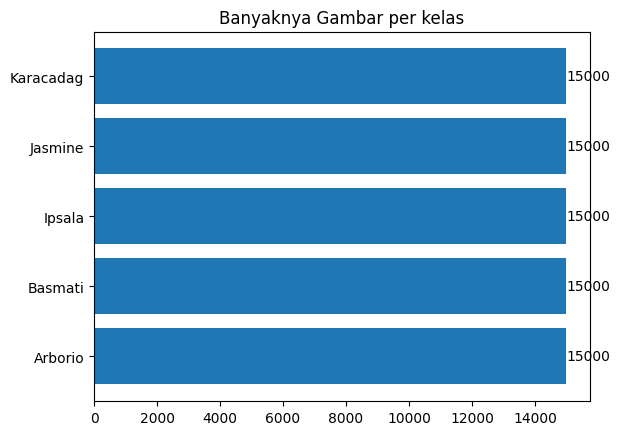

In [ ]:
img_count = [len(os.listdir(os.path.join("Rice_Image_Dataset", cls))) for cls in classes]
bars = plt.barh(classes, img_count)

for bar, count in zip(bars, img_count):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), ha='left', va='center')

plt.title("Banyaknya Gambar per kelas")
plt.show()

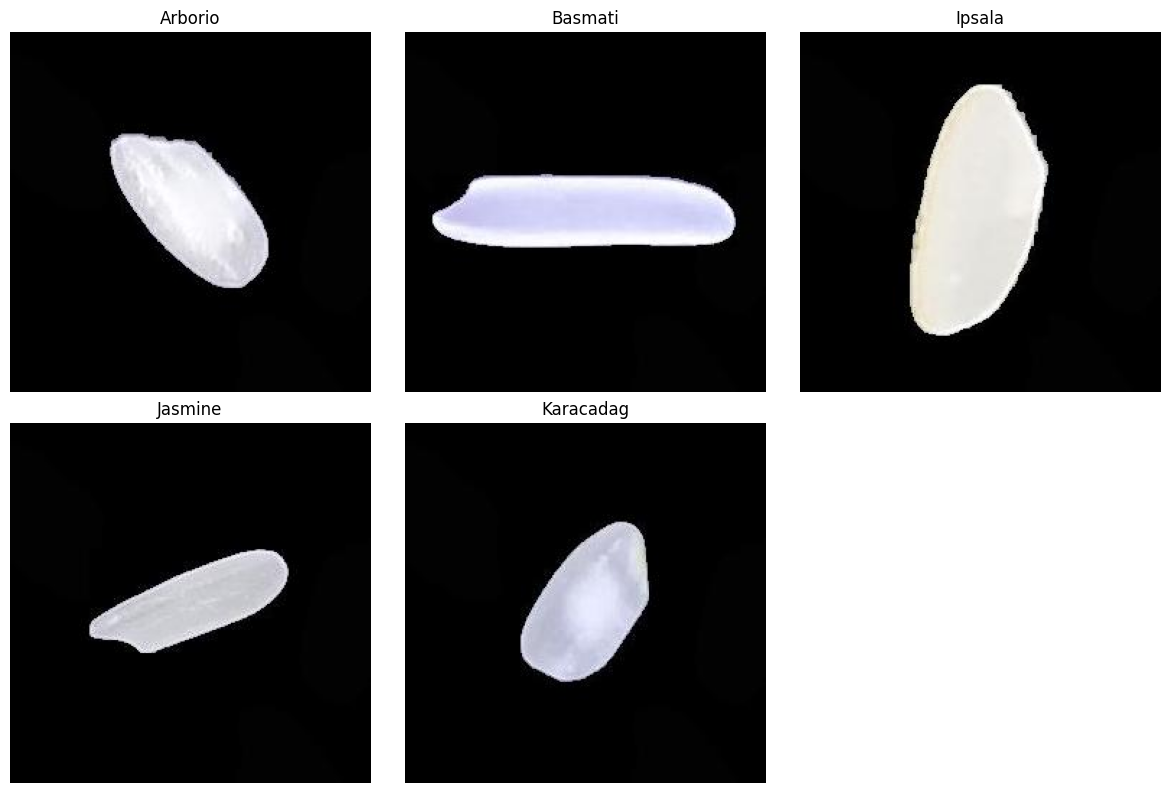

In [ ]:
valid_extensions=('.jpg', '.png', '.jpeg')

plt.figure(figsize=(12, 8))
for i, category in enumerate(classes):
    folder_path = os.path.join(DS_PATH, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    if not image_path.lower().endswith(valid_extensions):
        continue
    img = plt.imread(image_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# pembagian dataset training dan validation
train, val = image_dataset_from_directory(DS_PATH,
                             labels='inferred',
                             label_mode='categorical',
                             class_names=None,
                             color_mode='rgb',
                             batch_size=32,
                             image_size=(250, 250),
                             shuffle=True,
                             seed=42,
                             validation_split=0.2,
                             subset="both",
                             interpolation='bilinear',
                             follow_links=False)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Using 15000 files for validation.


# Model 1:  CNN


In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(train, epochs=10, validation_data=val)

Epoch 1/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.2877 - accuracy: 0.9533 - val_loss: 0.0854 - val_accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0709 - accuracy: 0.9758 - val_loss: 0.0594 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0451 - accuracy: 0.9848 - val_loss: 0.0475 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0729 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0720 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0

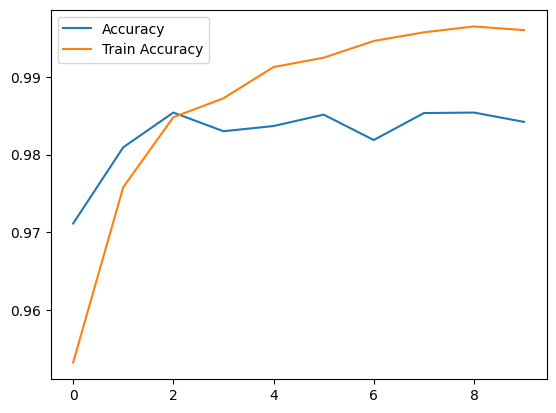

In [ ]:
plt.plot(history.history['val_accuracy'], label="Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.legend()
plt.show()

In [ ]:
model1.save("rice_model.h5")

# Model 2: MobileNetV2


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

for layer in base_model.layers:
    layer.trainable = False

model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(train, validation_data=val, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 140s 73ms/step - loss: 0.1264 - accuracy: 0.9542 - val_loss: 0.0568 - val_accuracy: 0.9805
Epoch 2/5
1875/1875 [==============================] - 136s 72ms/step - loss: 0.0710 - accuracy: 0.9749 - val_loss: 0.0724 - val_accuracy: 0.9749
Epoch 3/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0605 - accuracy: 0.9789 - val_loss: 0.0487 - val_accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0550 - accuracy: 0.9805 - val_loss: 0.0585 - val_accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0494 - accuracy: 0.9829 - val_loss: 0.0413 - val_accuracy: 0.9849


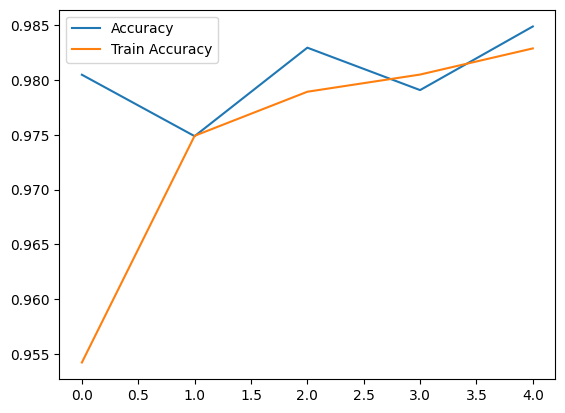

In [ ]:
plt.plot(history.history['val_accuracy'], label="Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.legend()
plt.show()

In [ ]:
model2.save("mobilenet.h5")

# Evaluation

In [ ]:
true_classes = []

for _, cls_batch in val.as_numpy_iterator():
    true_classes.extend(cls_batch.argmax(axis=1).tolist())

print("Banyaknya gambar pada dataset Validation:", len(true_classes))

Banyaknya gambar pada dataset Validation: 15000


In [ ]:
from sklearn.metrics import classification_report

pred1 = model1.predict(val)
pred2 = model2.predict(val)
predicted_classes1 = np.argmax(pred1, axis=1)
predicted_classes2 = np.argmax(pred2, axis=1)

report1 = classification_report(true_classes, predicted_classes1, target_names=classes)
report2 = classification_report(true_classes, predicted_classes2, target_names=classes)
print("\n\nClassification Report CNN Model:")
print(report1)
print("\n\nClassification Report MobileNet Model:")
print(report2)

469/469 [==============================] - 26s 56ms/step


Classification Report CNN Model:
              precision    recall  f1-score   support

     Arborio       0.98      0.96      0.97      3029
     Basmati       0.99      0.99      0.99      3116
      Ipsala       1.00      1.00      1.00      2898
     Jasmine       0.98      0.99      0.99      2994
   Karacadag       0.97      0.99      0.98      2963

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



Classification Report MobileNet Model:
              precision    recall  f1-score   support

     Arborio       0.97      0.98      0.98      3029
     Basmati       0.98      0.99      0.99      3116
      Ipsala       1.00      1.00      1.00      2898
     Jasmine       0.99      0.98      0.98      2994
   Karacadag       0.98      0.98      0.98      2963

    accuracy                           0.98     1500

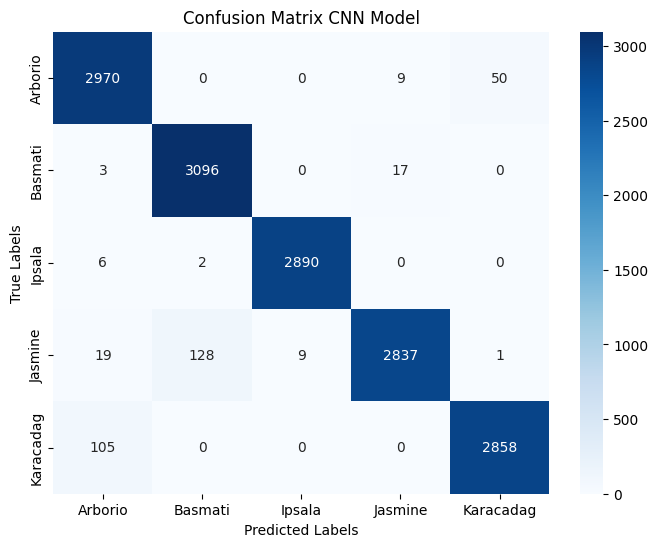

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix CNN Model')
plt.show()

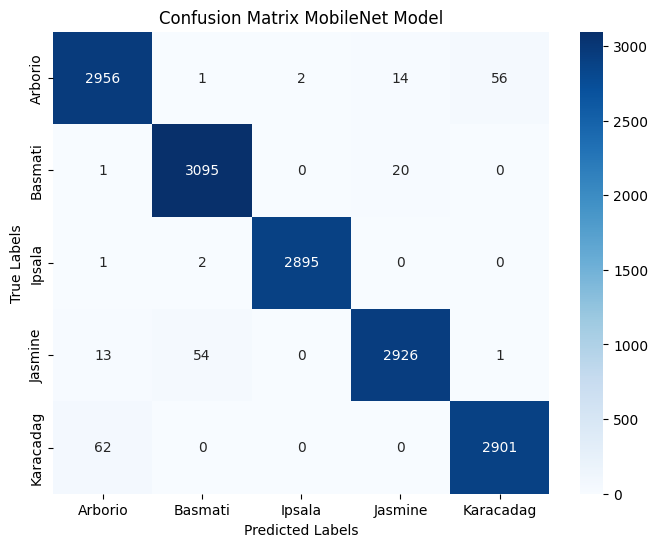

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix MobileNet Model')
plt.show()

# Prediction

In [ ]:
from keras.utils import load_img, img_to_array
import random
import glob

In [ ]:
SAMPLE_SIZE = 10

image_files = random.sample(glob.glob("/content/Rice_Image_Dataset/*/*.jpg"), SAMPLE_SIZE)
print("{:25s}{:12s}{:12s}\n".format("Image", "CNN", "MobileNet"))
for path in image_files:
    img_class = os.path.basename(path)
    img = load_img(path)
    input_arr = img_to_array(img)
    pred1 = model1(np.array([input_arr]))
    pred2 = model2(np.array([input_arr]))
    print(f"{img_class:25s}{classes[np.argmax(pred1)]:12s}{classes[np.argmax(pred1)]:12s}")

Image                    CNN         MobileNet   

Karacadag (9969).jpg     Karacadag   Karacadag   
Arborio (7158).jpg       Arborio     Arborio     
Arborio (1380).jpg       Arborio     Arborio     
Ipsala (5270).jpg        Ipsala      Ipsala      
Ipsala (1564).jpg        Ipsala      Ipsala      
basmati (598).jpg        Basmati     Basmati     
Arborio (2822).jpg       Arborio     Arborio     
Ipsala (8491).jpg        Ipsala      Ipsala      
Arborio (5044).jpg       Arborio     Arborio     
Jasmine (6319).jpg       Jasmine     Jasmine     


Predict via Streamlit:

https://riceclassification.streamlit.app/